# Unsupervised Learning on Country Data

## Background

#### Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

#### About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

#### Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.



## Import libraries and raw data

In [329]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.metrics import silhouette_score


In [330]:
#import data
data = pd.read_csv("Country-data.csv")
df = pd.DataFrame(data)
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## Preprocessing

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [332]:
#find any duplicate entries in data
duplicate_countries = df['country'].duplicated().sum()
print(f'Number of duplicates: {duplicate_countries}')

Number of duplicates: 0


In [333]:
#find any missing entries in data
missing_values = df.isnull().sum()
missing_values

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

From the preliminary analysis, it seems there are no duplicate or missing values in our dataframe. We can now move on to the exploratory data analysis.

## Exploratory Data Analysis (EDA)

### Pairplot

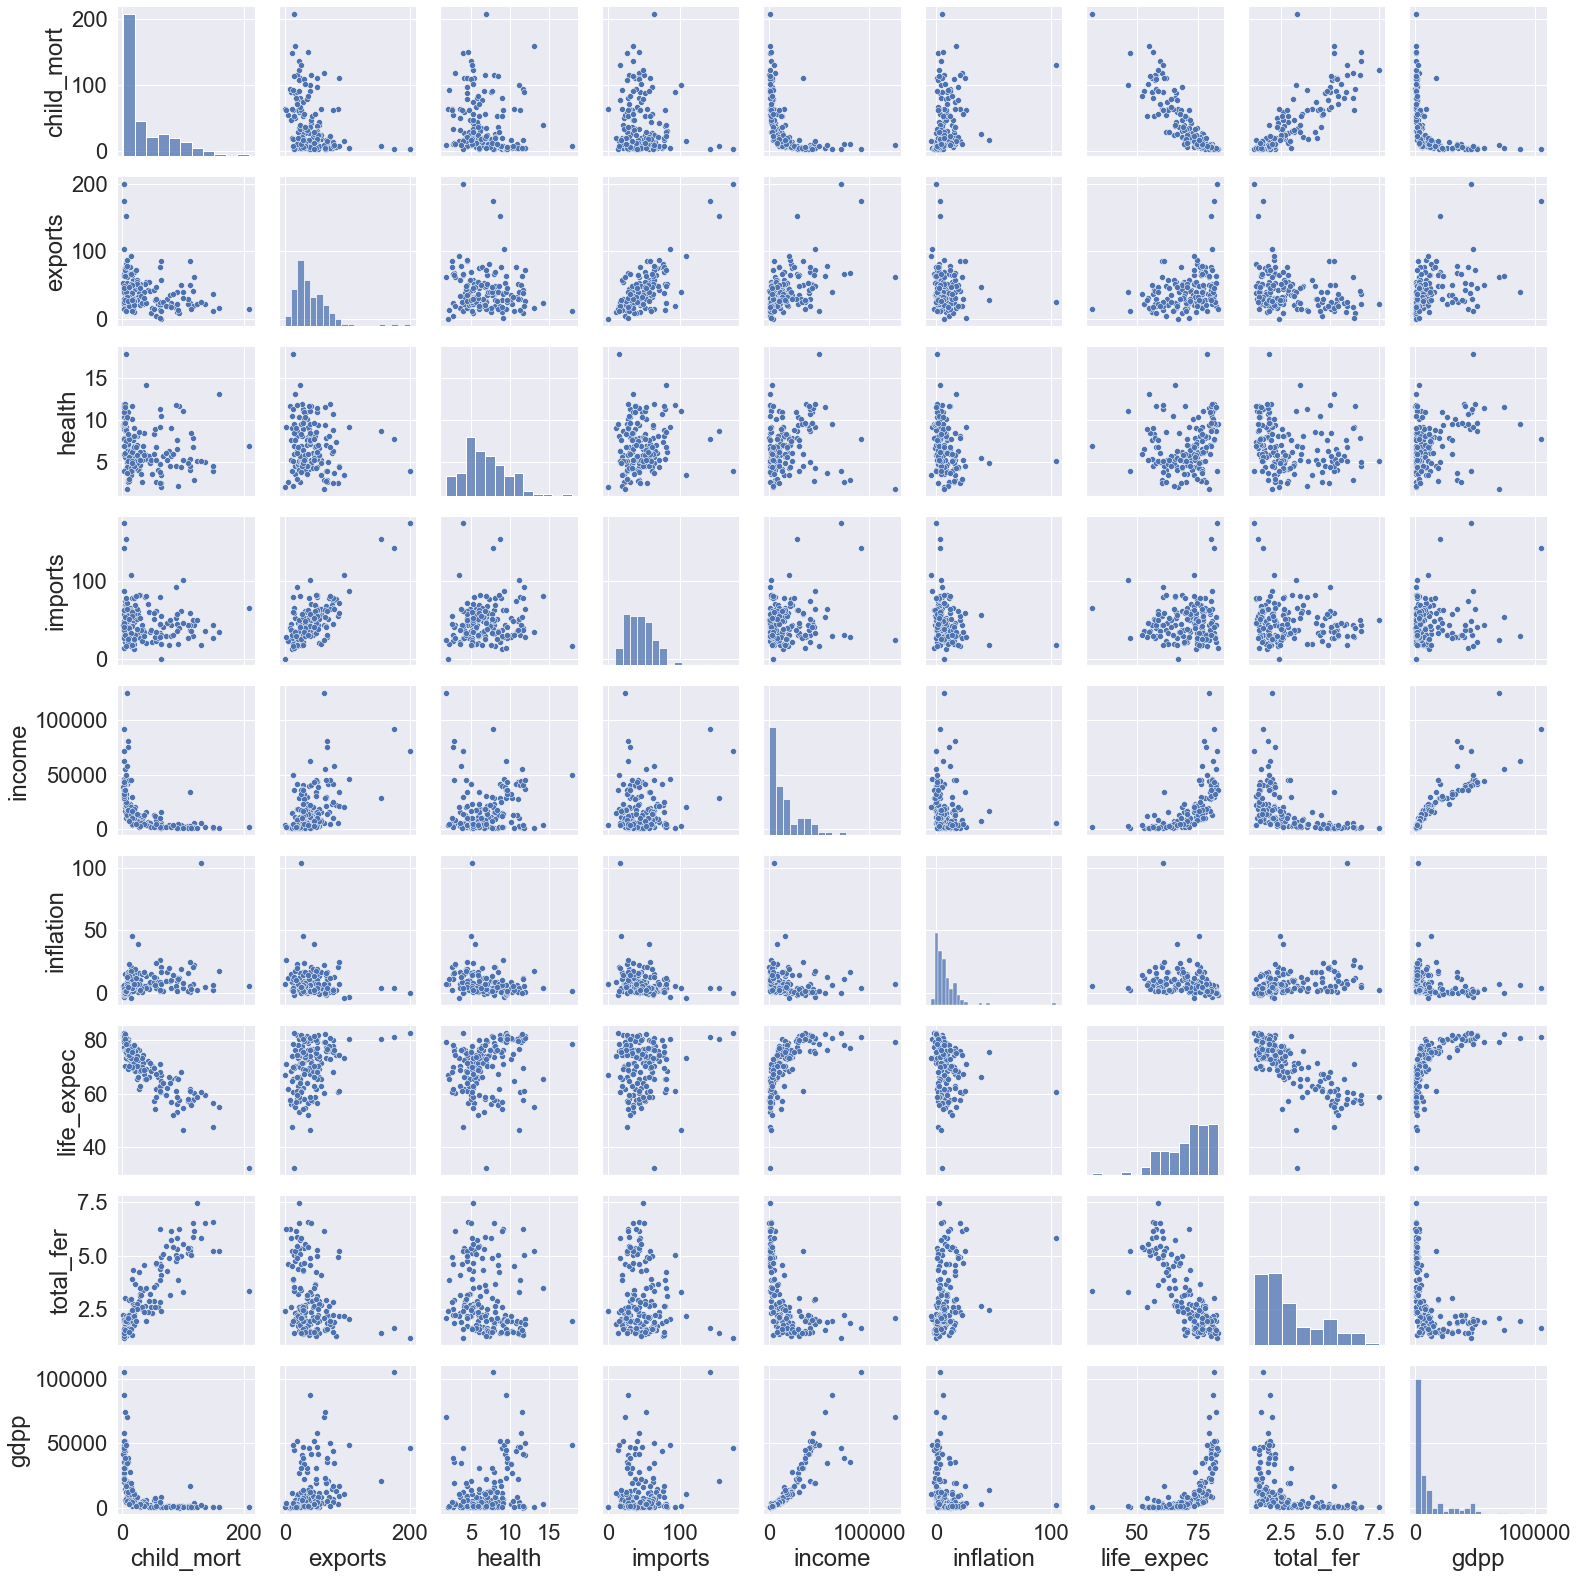

In [334]:
#Plot the pair plots to be able to identify trends
sns.set(font_scale=2)
sns.pairplot(data=df, palette="viridis")

<AxesSubplot:>

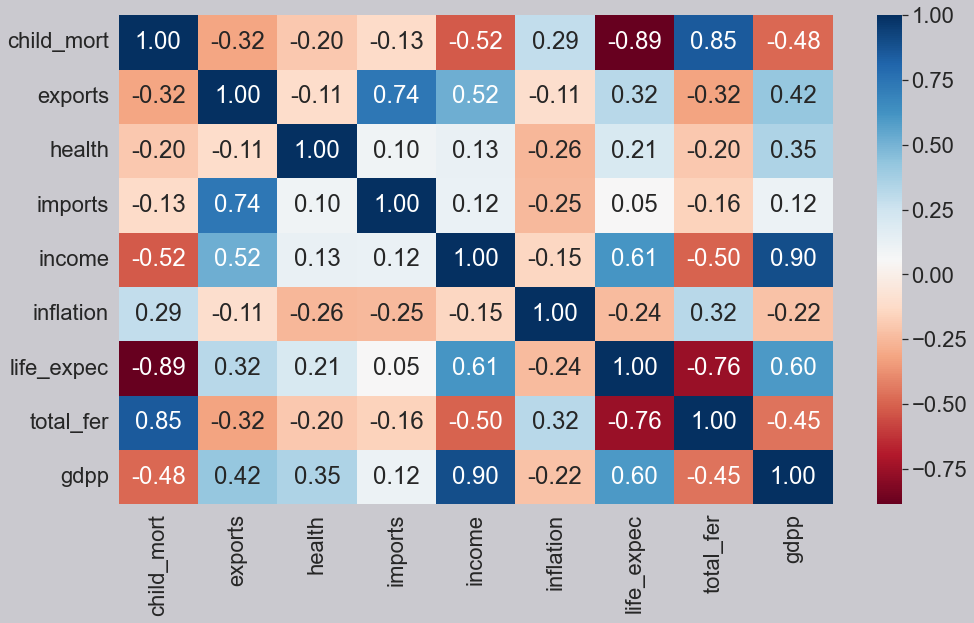

In [314]:
#Plot heat map
fig = plt.figure(figsize = (16, 9), facecolor='#cac9cf')
sns.heatmap(df.corr() , annot=True , fmt=".2f" , cmap = 'RdBu')


#### Observations
- Based on the results, as GDP increases, we observe that child mortality and total fertility decreases while life expectancy and income increases.
- As life expectancy increases, we observe that child mortality decreases.
- Moreover, as GDP increases, we observe that inflation decreases.
- As a general trend, when health increases, we observe less child mortality
- Child mortality and total fertility is highly positively correlated.
- On the other hand, child mortality and total fertility are negatively correlated to life expectancy.
- Income and GDP seems to be highly positively correlated.


### Ranking of top and bottom countries
I would like to show the top and bottom 5 for each country for each of the other metrics. This would give me an idea of how well each country does. At the same time, it is an indication on which countries would potentially need more aid.

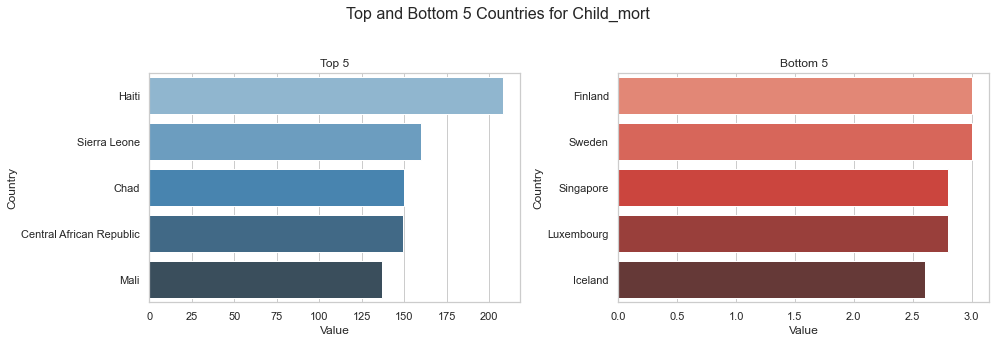

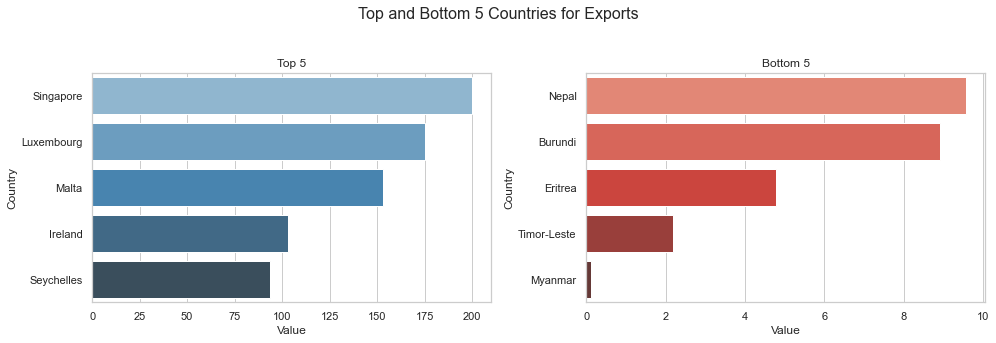

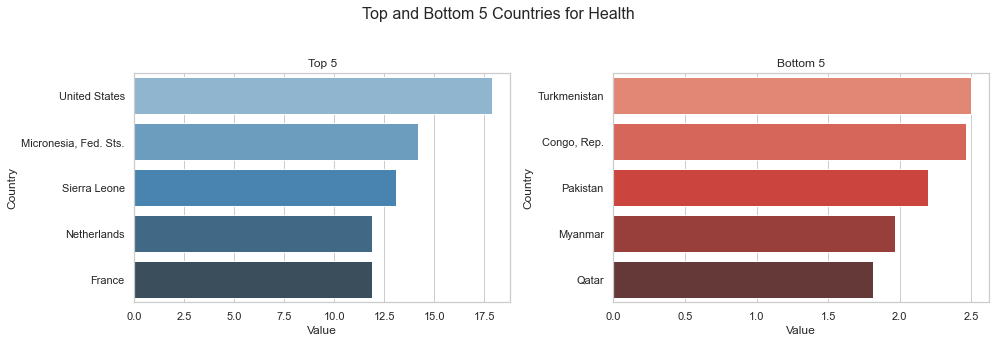

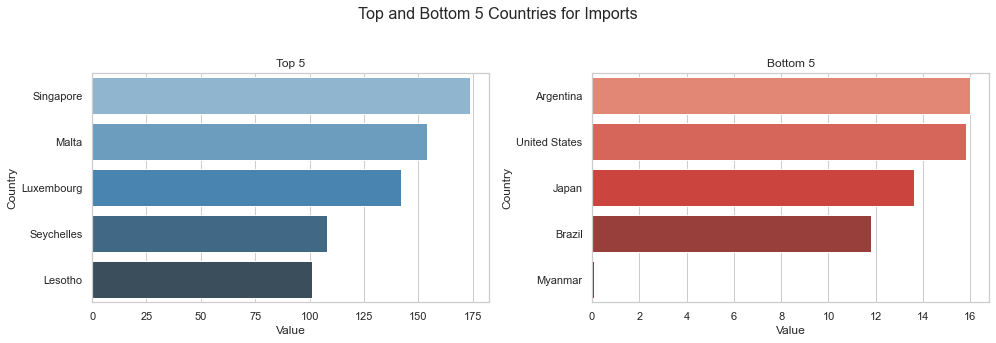

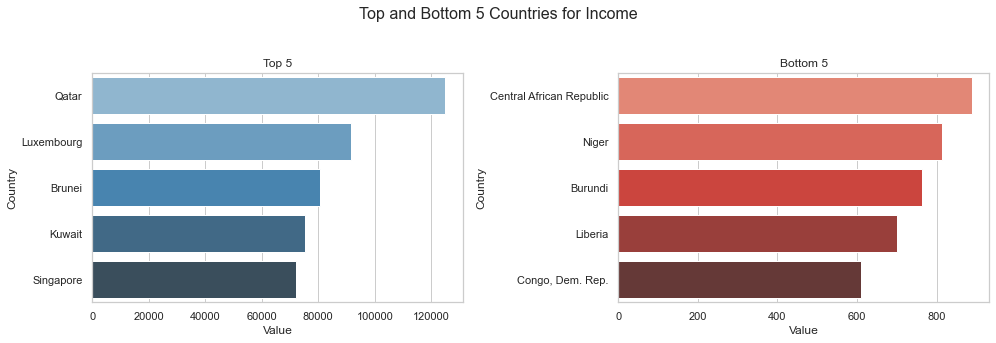

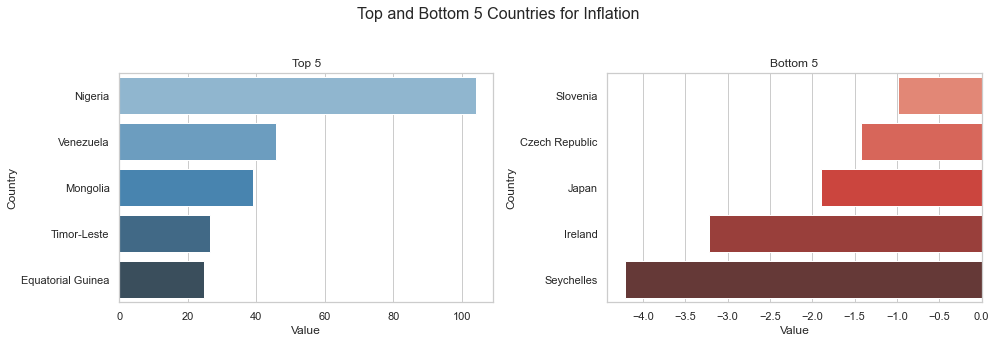

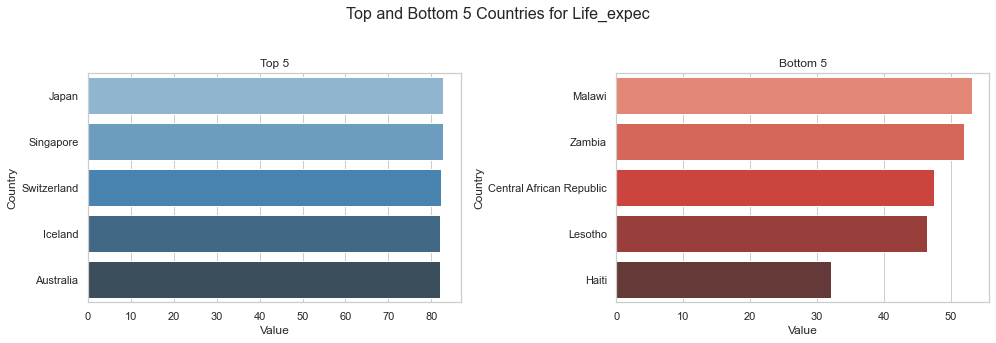

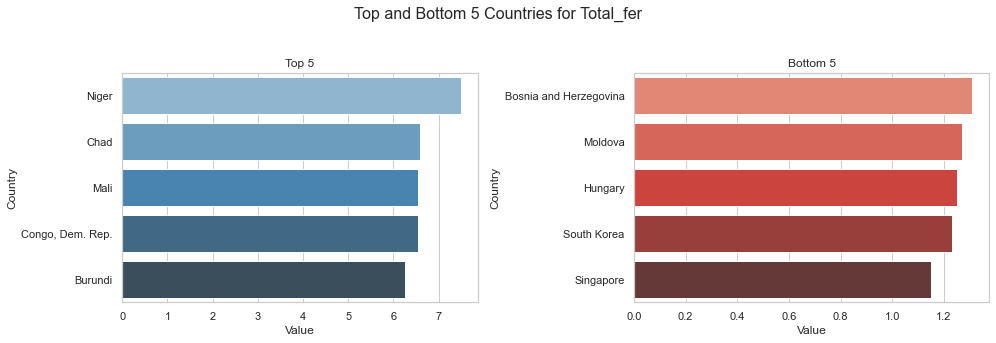

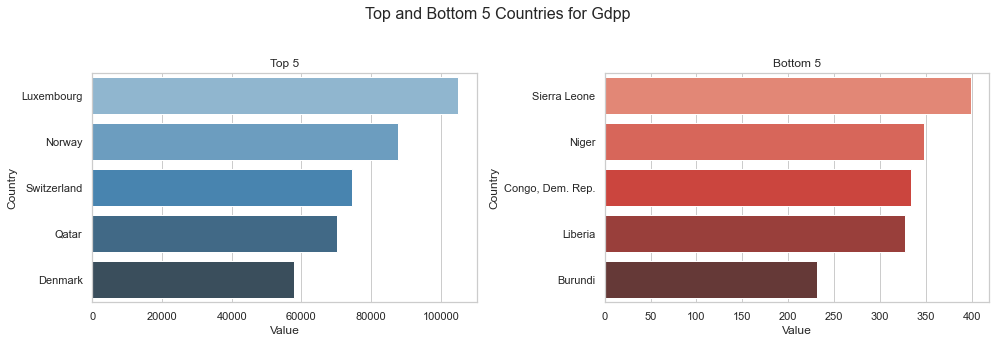

In [335]:
# Rank the top and bottom 3 of each country
sns.set(font_scale=1)

metrics = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
ranking_countries_per_metric = {}

for metric in metrics:
    # Sort in descending order for "higher is better"
    sorted_df = df.sort_values(by=metric, ascending=False)
    
    # Extract top 3 and bottom 3 countries
    top_countries = sorted_df.head(5)[['country', metric]]
    bottom_countries = sorted_df.tail(5)[['country', metric]]
    
    # Store the results
    ranking_countries_per_metric[metric] = {'Top 5': top_countries, 'Bottom 5': bottom_countries}

# Set the visual aesthetics for the plots
sns.set_style("whitegrid")

# Iterate through each metric and its rankings
for metric, rankings in ranking_countries_per_metric.items():
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f'Top and Bottom 5 Countries for {metric.capitalize()}', fontsize=16)
    
    # Plotting the top 3 countries
    sns.barplot(x=metric, y='country', data=rankings['Top 5'], palette='Blues_d', ax=axes[0])
    axes[0].set_title('Top 5')
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Country')
    
    # Plotting the bottom 3 countries
    sns.barplot(x=metric, y='country', data=rankings['Bottom 5'], palette='Reds_d', ax=axes[1])
    axes[1].set_title('Bottom 5')
    axes[1].set_xlabel('Value')
    axes[1].set_ylabel('Country')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


## Analysis of Data

### Scaler
From the data, we can tell the data are scaled differently. As such, we will be using standard scaler to ensure all data is scaled proportionally

In [337]:
#Splitting of data into train and test set
df_countries = pd.DataFrame(df, columns=['country'])
df.drop(['country'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [338]:
#Scale to ensure that data is scaled proportionally
scaler = StandardScaler()
features = scaler.fit_transform(df)

In [339]:
scaled_df = pd.DataFrame (features) 
scaled_df.columns = df.columns
scaled_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


### Principal component analysis (PCA)

In [340]:
# Applying PCA
pca = PCA(n_components=2)  # Example: reducing to 2 dimensions for visualization
pca_df = pca.fit_transform(scaled_df)

# Creating a DataFrame for the PCA results
pca_df_result = pd.DataFrame(pca_df, columns=['Principal Component 1', 'Principal Component 2'])

# Explained variance can tell you how much information is retained in the principal components
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.4595174  0.17181626]


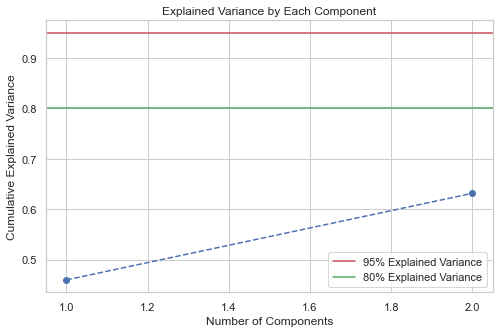

In [341]:
# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Each Component')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance')
plt.axhline(y=0.80, color='g', linestyle='-', label='80% Explained Variance')
plt.legend(loc='best')
plt.grid(True)
plt.show()


### K-Means

We first try to find the optimal number of K-means clusters.

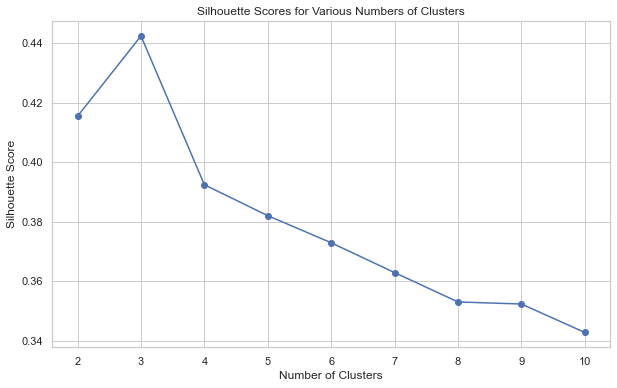

In [342]:
# Range of clusters to evaluate
range_clusters = range(2, 11)
silhouette_scores = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_df)
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    

plt.figure(figsize=(10, 6))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


The plot of silhouette scores across different numbers of clusters is a visualisation of number of clusters to use. The highest silhouette score of 3 indicates the most appropriate clustering, as it suggests the best separation and cohesion of the clusters.

/var/folders/h7/rjxfnnp10yndkbddd9yv8l8m0000gn/T/ipykernel_61267/3607103411.py:21: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



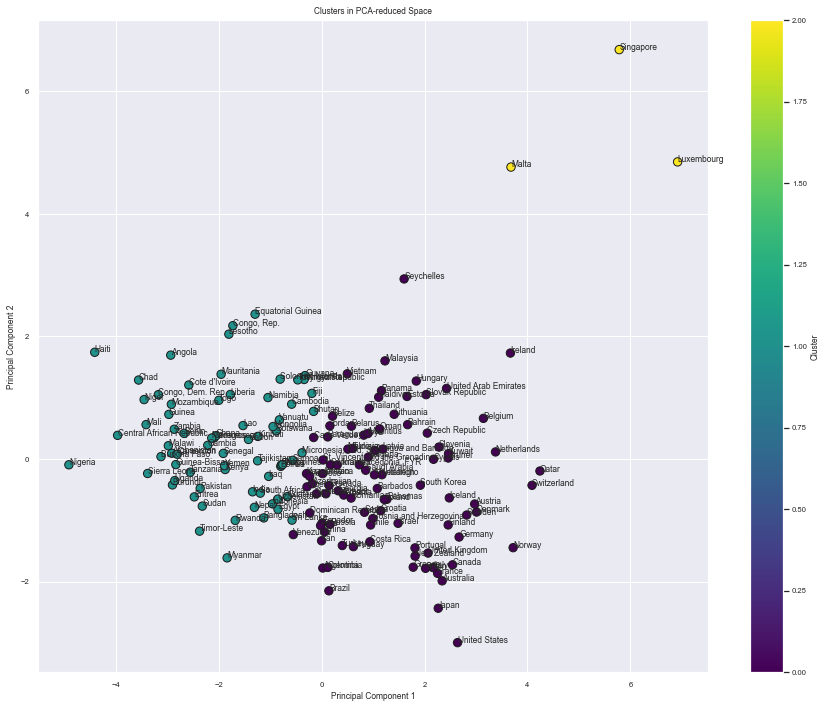

In [343]:
# Choosing the number of clusters (3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_df)

# Adding cluster information to the PCA-reduced data for visualization
df_pca_clustered = pd.DataFrame(pca_df, columns=['PC1', 'PC2'])
sns.set(font_scale=0.7)

#add back country
pca_df_result['country'] = df_countries['country']


df_pca_clustered['Cluster'] = clusters
plt.figure(figsize=(15, 12))
plt.scatter(df_pca_clustered['PC1'], df_pca_clustered['PC2'], c=df_pca_clustered['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=70)
for i, txt in enumerate(pca_df_result['country']):
    plt.annotate(txt, (pca_df_result['Principal Component 1'][i], pca_df_result['Principal Component 2'][i]))
plt.title('Clusters in PCA-reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

0    93
1    71
2     3
Name: Cluster, dtype: int64


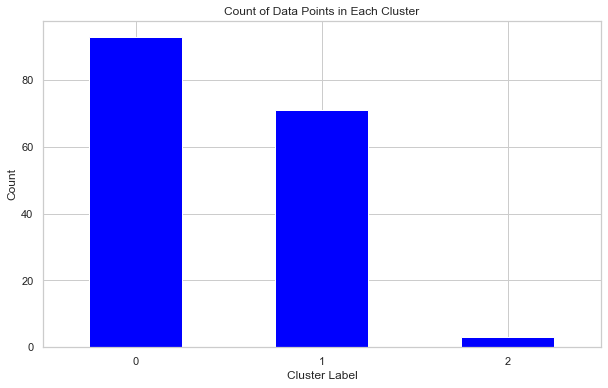

In [350]:
# Create a DataFrame from cluster labels
cluster_labels = pd.DataFrame(clusters, columns=['Cluster'])

# Count the occurrences of each cluster label
cluster_counts = cluster_labels['Cluster'].value_counts().sort_index()
print(cluster_counts)

# Ensuring a consistent style in plots
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='Blue')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Count of Data Points in Each Cluster')
plt.xticks(rotation=0)
plt.show()

Based on the results from the bar chart, we can see that most of the countries are represented by cluster 0 and 1.

In [349]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

new_pca = PCA(n_components=2)  # We focus on the first two principal components
pca_results = pca.fit_transform(df_scaled)

features = df.columns
loadings = pca.components_.T

df_loadings = pd.DataFrame(loadings, columns=['Principal Component 1', 'Principal Component 2'], index=features)
print(df_loadings)

            Principal Component 1  Principal Component 2
child_mort              -0.419519               0.192884
exports                  0.283897               0.613163
health                   0.150838              -0.243087
imports                  0.161482               0.671821
income                   0.398441               0.022536
inflation               -0.193173              -0.008404
life_expec               0.425839              -0.222707
total_fer               -0.403729               0.155233
gdpp                     0.392645              -0.046022


##### Principal Component 1 (PC1):

Features with high positive loadings on PC1, such as income, life_expec, and gdpp, indicate that PC1 largely represents the overall economic well-being and development level of a country. Higher values of PC1 suggest better economic conditions and health outcomes.
Features with high negative loadings on PC1, such as child_mort and total_fer (total fertility), indicate that as these indicators worsen (higher child mortality and fertility rates), the PC1 score decreases. This further reinforces that PC1 captures aspects of a country’s development where negative values might point towards underdevelopment.

##### Principal Component 2 (PC2):

Features like imports and exports have high positive loadings on PC2, indicating that this component captures elements related to trade. A country with a high score on PC2 might be heavily involved in trade, particularly in terms of imports.
Features with negative loadings, such as health and life_expec, suggest that countries with lower PC2 scores may allocate more resources towards health and consequently have better life expectancy. However, the positive or negative aspect should be interpreted relative to other loadings.

In [348]:
# Calculate absolute values to consider points on both positive and negative sides
pca_df_result['Abs_PC1'] = pca_df_result['Principal Component 1'].abs()
pca_df_result['Abs_PC2'] = pca_df_result['Principal Component 2'].abs()

# Sort data by 'Abs_PC1' and 'Abs_PC2' to find the top points
top_pc1 = pca_df_result.sort_values(by='Abs_PC1', ascending=False).head(10)
top_pc2 = pca_df_result.sort_values(by='Abs_PC2', ascending=False).head(10)

print("Top data points best represented by PC1:")
print(top_pc1[['country', 'Principal Component 1']])

print("\nTop data points best represented by PC2:")
print(top_pc2[['country', 'Principal Component 2']])

# Join the original data with the top indices from PCA to get meaningful labels or additional context
top_pc1_data = df.iloc[top_pc1.index]
top_pc2_data = df.iloc[top_pc2.index]

print("Original data for top PC1 points:")
print(top_pc1_data)

print("\nOriginal data for top PC2 points:")
print(top_pc2_data)

Top data points best represented by PC1:
                      country  Principal Component 1
91                 Luxembourg               6.917755
133                 Singapore               5.783376
113                   Nigeria              -4.912066
66                      Haiti              -4.409717
123                     Qatar               4.242296
145               Switzerland               4.088544
31   Central African Republic              -3.964964
114                    Norway               3.721195
98                      Malta               3.679543
73                    Ireland               3.668628

Top data points best represented by PC2:
               country  Principal Component 2
133          Singapore               6.682090
91          Luxembourg               4.849844
98               Malta               4.765486
159      United States              -2.997364
131         Seychelles               2.939121
77               Japan              -2.435594
49   Equator

In [347]:
countries_needing_aid = pca_df_result.sort_values(by='Principal Component 1').head(10)
print("Countries that may need more aid based on PCA analysis:\n", countries_needing_aid[['country', 'Principal Component 1']])


Countries that may need more aid based on PCA analysis:
                       country  Principal Component 1
113                   Nigeria              -4.912066
66                      Haiti              -4.409717
31   Central African Republic              -3.964964
32                       Chad              -3.557555
112                     Niger              -3.450168
97                       Mali              -3.412255
132              Sierra Leone              -3.381625
37           Congo, Dem. Rep.              -3.173370
25               Burkina Faso              -3.122053
94                     Malawi              -2.979885


Negative Indicators: Countries with high negative scores on components related to poverty or risk factors could be identified as needing more aid. This would include countries like Nigeria, Haiti, Central African Republic, Chad, Niger, Mali, Sierra Leone, Congo, Dem. Rep., Burkina Faso and Malawi.

## Discussion

The objective of this analysis was to identify countries that might require more aid based on various socio-economic and health indicators. 

By employing PCA, we reduced the dimensionality of our data to capture the most significant features influencing country conditions. Following PCA, the Elbow Method and Silhouette scores helped us determine the optimal number of clusters, which is 3. K-means clustering was used to group countries into clusters based on their similarities across the principal components.



## Conclusion

Countries with low scores on PC1 might require interventions focused on economic development and reducing child mortality. In contrast, insights from PC2 can help tailor trade policies or health care initiatives depending on a country's trade involvement versus its health care needs.

Countries with high negative scores on components related to poverty or risk factors could be identified as needing more aid. This would include countries like Nigeria, Haiti, Central African Republic, Chad, Niger, Mali, Sierra Leone, Congo, Dem. Rep., Burkina Faso and Malawi.

These interpretations can guide deeper investigations into specific clusters of countries identified via clustering on these principal components, to better understand and address their unique challenges and needs.

The analysis demonstrates the power of machine learning techniques like PCA and K-means clustering in identifying patterns and needs across complex, multidimensional data. By focusing on the principal components that capture the most critical aspects of the countries' socio-economic and health statuses, stakeholders can better allocate resources and design interventions that are both strategic and impactful. Moving forward, integrating more diverse data sources and refining the analytical models, such as the GINI conefficient, will be crucial in enhancing the accuracy and relevance of the findings for global aid distribution

Original data from: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data/data